# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

df = sinasc_raw.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
print( df['munResLat'].min() )
print( df['munResLat'].max() )

-13.49976
-8.76889


In [5]:
intervalo_latitudes = pd.cut( x = df['munResLat'], bins = [-15, -10.5, 0])

In [6]:
df.pivot_table( 
                index = intervalo_latitudes, 
                values = ['APGAR1', 'CONSULTAS'], 
                aggfunc = ['min', 'max', 'mean', 'median', 'std', 'var']
              )

min              max                mean           median  \
               APGAR1 CONSULTAS APGAR1 CONSULTAS    APGAR1 CONSULTAS APGAR1   
munResLat                                                                     
(-15.0, -10.5]    0.0         1   10.0         9  8.070216  3.694297    8.0   
(-10.5, 0.0]      0.0         1   10.0         9  8.199771  3.467436    8.0   

                               std                 var            
               CONSULTAS    APGAR1 CONSULTAS    APGAR1 CONSULTAS  
munResLat                                                         
(-15.0, -10.5]         4  0.960767  0.643372  0.923073  0.413928  
(-10.5, 0.0]           4  1.002839  0.888240  1.005686  0.788970

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
print(df['munResArea'].min())
print(df['munResArea'].max())

459.978
34096.394


In [8]:
intervalo_areas = pd.cut( x = df['munResArea'], bins = [0, 3000, 50000] )

In [9]:
df.pivot_table( 
                index = intervalo_areas,
                values = ['APGAR5', 'CONSULTAS'],
                aggfunc = ['min', 'max', 'mean', 'median', 'std', 'var']
              )

min              max                mean           median  \
              APGAR5 CONSULTAS APGAR5 CONSULTAS    APGAR5 CONSULTAS APGAR5   
munResArea                                                                   
(0, 3000]        0.0         1   10.0         9  9.130351  3.740180    9.0   
(3000, 50000]    0.0         1   10.0         9  9.190836  3.537326    9.0   

                              std                 var            
              CONSULTAS    APGAR5 CONSULTAS    APGAR5 CONSULTAS  
munResArea                                                       
(0, 3000]             4  0.801124  0.607492  0.641799  0.369046  
(3000, 50000]         4  0.787591  0.820967  0.620299  0.673986

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
intervalo_altitudes = pd.qcut( x = df['munResAlt'], q = 4 )

In [11]:
df.pivot_table( 
                index = intervalo_altitudes,
                values = ['APGAR5', 'CONSULTAS'],
                aggfunc = ['min', 'max', 'mean', 'median', 'std', 'var']
              )

min              max                mean           median  \
               APGAR5 CONSULTAS APGAR5 CONSULTAS    APGAR5 CONSULTAS APGAR5   
munResAlt                                                                     
(84.999, 87.0]    0.0         1   10.0         9  9.214294  3.337702    9.0   
(87.0, 153.0]     0.0         1   10.0         9  9.253057  3.567244    9.0   
(153.0, 191.0]    0.0         1   10.0         9  9.133256  3.746180    9.0   
(191.0, 595.0]    0.0         1   10.0         9  9.125620  3.725375    9.0   

                               std                 var            
               CONSULTAS    APGAR5 CONSULTAS    APGAR5 CONSULTAS  
munResAlt                                                         
(84.999, 87.0]         4  0.761006  0.982834  0.579130  0.965962  
(87.0, 153.0]          4  0.824080  0.740259  0.679108  0.547984  
(153.0, 191.0]         4  0.785972  0.580052  0.617751  0.336460  
(191.0, 595.0]         4  0.802339  0.620341  0.643749  0.384823

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [12]:
regioes_imediatas = {
    
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    
    "Governador Jorge Teixeira": "Jaru",
    "Jaru": "Jaru",
    "Machadinho d'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    
    "Alvorada d'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    
    "Alta Floresta d'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão d'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia d'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia d'Oeste": "Cacoal",
    "São Felipe d'Oeste": "Cacoal",
    
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}

In [13]:
type(regioes_imediatas)

dict

In [14]:
df = sinasc_raw[ ['IDADEMAE', 'munResNome'] ].copy()
df.set_index(keys = 'munResNome', inplace=True)

In [15]:
media_por_imediata = df.groupby(regioes_imediatas).mean()
media_por_imediata

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.434757
Jaru,25.805579
Ji-Paraná,26.108682
Porto Velho,26.166303
Vilhena,26.417143


NameError: name 'eixo_x' is not defined

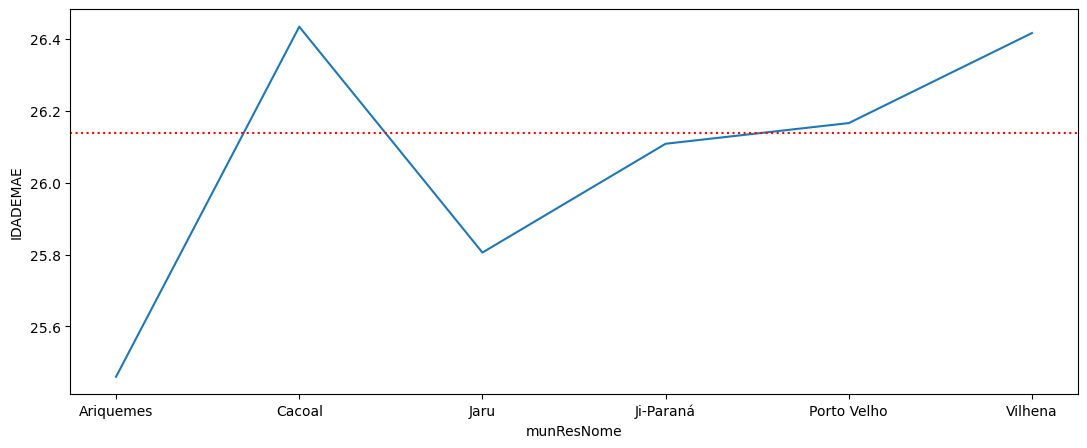

In [16]:
plt.figure(figsize=[13,5])

ax = sns.lineplot( data = media_por_imediata, 
                   x = media_por_imediata.index, 
                   y = media_por_imediata['IDADEMAE'] )



# traça linha na mediana
ax.axhline(y = media_por_imediata['IDADEMAE'].median(), color = 'red', linestyle = ':' )


# marca cada um dos valores de Y nos pontos
for x in eixo_x:
    
    ax.annotate( text = str( round( media_por_imediata.loc[x , 'IDADEMAE'], 2 ) ),
                 xy = (x, media_por_imediata.loc[x,'IDADEMAE']),
                 ha='center', va='bottom')

plt.plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [ ]:
mapping_IDH = {
    
    "Porto Velho": "IDH-M alto", 
    "Vilhena": "IDH-M alto", 
    "Cacoal": "IDH-M alto", 
    "Ji-Paraná": "IDH-M alto", 
    "Pimenta Bueno": "IDH-M alto", 
    "Ariquemes": "IDH-M alto", 
    "Rolim de Moura": "IDH-M alto",
    
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão d'Oeste": "IDH-M médio",
    "Santa Luzia d'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari": "IDH-M médio",
    "São Felipe d'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada d'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia d'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta d'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho d'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

In [ ]:
df.columns

In [ ]:
df = sinasc_raw[ 
    
    ['munResNome', 'IDADEMAE', 'ESCMAE', 'IDADEPAI', 'GESTACAO', 'CONSULTAS', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO'] 

].copy()

df.set_index('munResNome', inplace=True)

In [ ]:
agrupamento = df.groupby([mapping_IDH, 'ESCMAE'])
agrupamento.mean(numeric_only=True)

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [ ]:
mapping_IFMD = {
    
    "Ariquemes": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Porto Velho": "Desenvolvimento moderado",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Cacoal": "Desenvolvimento moderado",
    "Santa Luzia d'Oeste": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Pimenteiras do Oeste": "Desenvolvimento moderado",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Alta Floresta d'Oeste": "Desenvolvimento moderado",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "São Felipe d'Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "Cerejeiras": "Desenvolvimento moderado",
    "Monte Negro": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    
    "Espigão d'Oeste": "Desenvolvimento regular",
    "Seringueiras": "Desenvolvimento regular",
    "Alvorada d'Oeste": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Cabixi": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Nova Brasilândia d'Oeste": "Desenvolvimento regular",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Corumbiara": "Desenvolvimento regular",
    "Alto Paraíso": "Desenvolvimento regular",
    "Cacaulândia": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Mirante da Serra": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Machadinho d'Oeste": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Governador Jorge Teixeira": "Desenvolvimento regular"
    
}

In [ ]:
df = sinasc_raw[ 
    
    ['munResNome', 'IDADEMAE', 'ESCMAE', 'IDADEPAI', 'GESTACAO', 'CONSULTAS', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO'] 

].copy()

df.set_index('munResNome', inplace=True)

In [ ]:
agrupamento = df.groupby([mapping_IFMD, 'ESCMAE'])
agrupamento.mean(True)

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [ ]:
mapping_PIP = {
    
    "Porto Velho": "Acima 1B",
    "Ji-Paraná": "Acima 1B",
    "Vilhena": "Acima 1B",
    "Ariquemes": "Acima 1B",
    "Cacoal": "Acima 1B",
    "Jaru": "Acima 1B",
    "Rolim de Moura": "Acima 1B",
    "Pimenta Bueno": "Acima 1B",
    
    "Guajará-Mirim": "Acima 500M",
    "Ouro Preto do Oeste": "Acima 500M",
    "Buritis": "Acima 500M",
    "Machadinho do Oeste": "Acima 500M",
    "Espigão d'Oeste": "Acima 500M",
    "São Miguel do Guaporé": "Acima 500M",
    "Candeias do Jamari": "Acima 500M",
    "Nova Mamoré": "Acima 500M",
    "Cerejeiras": "Acima 500M",
    
    "Alta Floresta do Oeste": "Acima 300M",
    "Presidente Médici": "Acima 300M",
    "Cujubim": "Acima 300M",
    "Nova Brasilândia do Oeste": "Acima 300M",
    "Alto Paraíso": "Acima 300M",
    "São Francisco do Guaporé": "Acima 300M",
    "Colorado do Oeste": "Acima 300M",
    
    "Monte Negro": "Acima 200M", 
    "Alto Alegre dos Parecis": "Acima 200M", 
    "Campo Novo de Rondônia": "Acima 200M", 
    "Alvorada do Oeste": "Acima 200M", 
    
    "Chupinguaia": "Acima 100M",
    "Corumbiara": "Acima 100M",
    "Ministro Andreazza": "Acima 100M",
    "Urupá": "Acima 100M",
    "Costa Marques": "Acima 100M",
    "Seringueiras": "Acima 100M",
    "Mirante da Serra": "Acima 100M",
    "Governador Jorge Teixeira": "Acima 100M",
    "Theobroma": "Acima 100M",
    "Santa Luzia do Oeste": "Acima 100M",
    "Novo Horizonte do Oeste": "Acima 100M",
    "Itapuã do Oeste": "Acima 100M",
    "Vale do Paraíso": "Acima 100M",
    "Cacaulândia": "Acima 100M",
    "Cabixi": "Acima 100M",
    "Vale do Anari": "Acima 100M",
    
    "Nova União": "Até 100M",
    "Parecis": "Até 100M",
    "Rio Crespo": "Até 100M",
    "Pimenteiras do Oeste": "Até 100M",
    "Teixeirópolis": "Até 100M",
    "São Felipe do Oeste": "Até 100M",
    "Castanheiras": "Até 100M",
    "Primavera de Rondônia": "Até 100M"
    
}

In [ ]:
df = sinasc_raw[ 
    
    ['munResNome', 'IDADEMAE', 'ESCMAE', 'IDADEPAI', 'GESTACAO', 'CONSULTAS', 'QTDFILVIVO', 'QTDFILMORT', 'APGAR1', 'APGAR5', 'PESO'] 

].copy()

df.set_index('munResNome', inplace=True)

In [ ]:
agrupamento = df.groupby([mapping_PIP, 'ESCMAE'])
agrupamento.mean(numeric_only=True)

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Idade das mães que não possuem nenhuma escolaridade, são de 5 a 10 anos maiores nos municípios com PIP abaixo de 300M.

Nos municipios com IDH e PIP menores, o peso médio das crianças cuja mãe não tem nenhuma escolaridade, é o único abaixo de 3kg.

APGAR5 não tem relação direta com o IDH, PIP ou IFDM.